## Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Code taken from: https://github.com/egonSchiele/grokking_algorithms/blob/master/03_recursion/python/03_factorial.py
def fact(x):
  if x == 1:
    return 1
  else:
    return x * fact(x-1)

## Create Array and Write FOR Loop to Get Factorials

In [32]:
# Set seed for replicability
np.random.seed(14)
nums = list(np.random.randint(low=100, high=500, size=10))

In [4]:
# Use a FOR loop to get factorials
for_loop_times = []
for_factorials = []
# for i in nums:
#     number = i
#     factorial = 1
#     t1 = time.perf_counter()
#     for k in range(1, number+1):
#         factorial = factorial*k
#         for_factorials.append(factorial)
#     t2 = time.perf_counter()
#     execution = t2-t1
#     for_loop_executiontimes.append(execution)
#     print(f'Factorial of {i} is {factorial}')

for i in nums:
    fac=1
    execution = 0
    for k in range(1,i+1):
        t1 = time.perf_counter()
        fac = fac*k
        t2 = time.perf_counter()
        execution = t2-t1
    for_loop_times.append(execution)
    for_factorials.append(fac)

## Use Recursive Function to Get Factorials

In [10]:
# Use recursion to get factorials -- code taken from 
# Using a python list here instead of output of np.random.randint() to avoid long_scalars overflow RuntimeWarning
# Warning arises because of bit limitations of np.int32 and np.int64 dtypes, which do not arise in python-native integer dtypes
recursion_times = []
recursion_factorials = []

for i in [207, 444, 368, 427, 349, 458, 334, 256, 238, 308]:
    t1 = time.perf_counter()
    factorial = fact(i)
    t2 = time.perf_counter()
    execution = t2-t1
    recursion_factorials.append(factorial)
    recursion_times.append(execution)
    print(execution)

# Check that factorials computed recursively are the same as those computed using a for-loop.
if recursion_factorials != for_factorials:
    raise ValueError('Factorial sets made from recursion and for looping are not equal. Take a harder look at how each was computed.')

5.4500000004509275e-05
0.00011580000000321888
7.909999999355932e-05
9.819999999649554e-05
7.48000000214688e-05
0.00010860000000434411
7.039999999847169e-05
4.889999999591055e-05
4.46999999894615e-05
6.310000000553373e-05


## Make and Visualize a DataFrame with Timing Results

In [19]:
# Subtract for-loop times from recursion times for differentials
diffs = [recursion_times - for_loop_times for recursion_times, for_loop_times in zip(recursion_times, for_loop_times)]

([5.4300000002172055e-05,
  0.0001154000000127553,
  7.879999999715892e-05,
  9.790000000009513e-05,
  7.440000001679437e-05,
  0.00010830000000794371,
  7.010000000207128e-05,
  4.859999998529929e-05,
  4.4399999978850246e-05,
  6.280000000913333e-05],
 [5.4500000004509275e-05,
  0.00011580000000321888,
  7.909999999355932e-05,
  9.819999999649554e-05,
  7.48000000214688e-05,
  0.00010860000000434411,
  7.039999999847169e-05,
  4.889999999591055e-05,
  4.46999999894615e-05,
  6.310000000553373e-05])

In [22]:
df = pd.DataFrame(
        {
        'number' : nums
        ,'recursive_compute' : recursion_times
        ,'for_loop_compute'  : for_loop_times
        ,'compute_diff'      : diffs
        })
df

,number,recursive_compute,for_loop_compute,compute_diff
0,207,0.000055,2.000000e-07,0.000054
1,444,0.000116,4.000000e-07,0.000115
2,368,0.000079,3.000000e-07,0.000079
3,427,0.000098,3.000000e-07,0.000098
4,349,0.000075,4.000000e-07,0.000074
5,458,0.000109,3.000000e-07,0.000108
6,334,0.000070,3.000000e-07,0.000070
7,256,0.000049,3.000000e-07,0.000049
8,238,0.000045,3.000000e-07,0.000044
9,308,0.000063,3.000000e-07,0.000063


The assignment called for the dataframe to have the factorial included, but pandas had issues with the large integers.

The original numbers should hold a reasonable approximation to compare compute times, and the assignment does not call for visualization of the factorials on any scale, so I have opted to accept this pandas limitation.

## Visualization

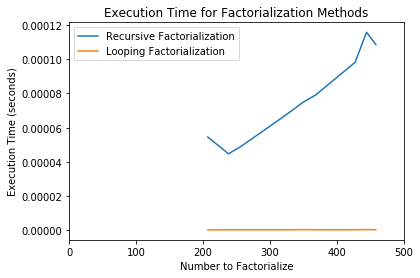

In [24]:
ax = sns.lineplot(x='number', y='recursive_compute', data=df)
ax = sns.lineplot(x='number', y='for_loop_compute', data=df)
ax.legend(['Recursive Factorialization','Looping Factorialization'])

plt.title('Execution Time for Factorialization Methods')
plt.xlabel('Number to Factorialize')
plt.ylabel('Execution Time (seconds)')
plt.xticks([0,100,200,300,400,500])
plt.show()

## Results

We see that using recursion for factorialization of numbers between 100 and 500 is more expensive than using a for-loop, and to a good degree. This is expected behavior; recursive factorializing defined here invokes the function once to find that it has not met the condition, then moves onto the next lowest number, creating a (relatively) lengthy call stack. The function then traces back to perform the actual math. The for-loop for this only invokes the last piece of this process, where it performs the multiplication iteratively (since its beginning and end are already defined by the range() method).

The complexity of the recursive function would be something on the order of $O(n({log n}))$ (recursing $n$ times and $log(n)$ for the added complexity of finding the next number down until the program reaches 1). whereas the complexity of the iterative function is linear at $O(n)$ (performing one operation for each iteration).

The takeaway here is that using iterative factorialization will be more efficient computationally across all cases, but especially as the input grows, specifically at a $log_{2}$ rate.